In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [126]:
data = pd.read_csv(r"C:\Users\Jayant\IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [128]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [129]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


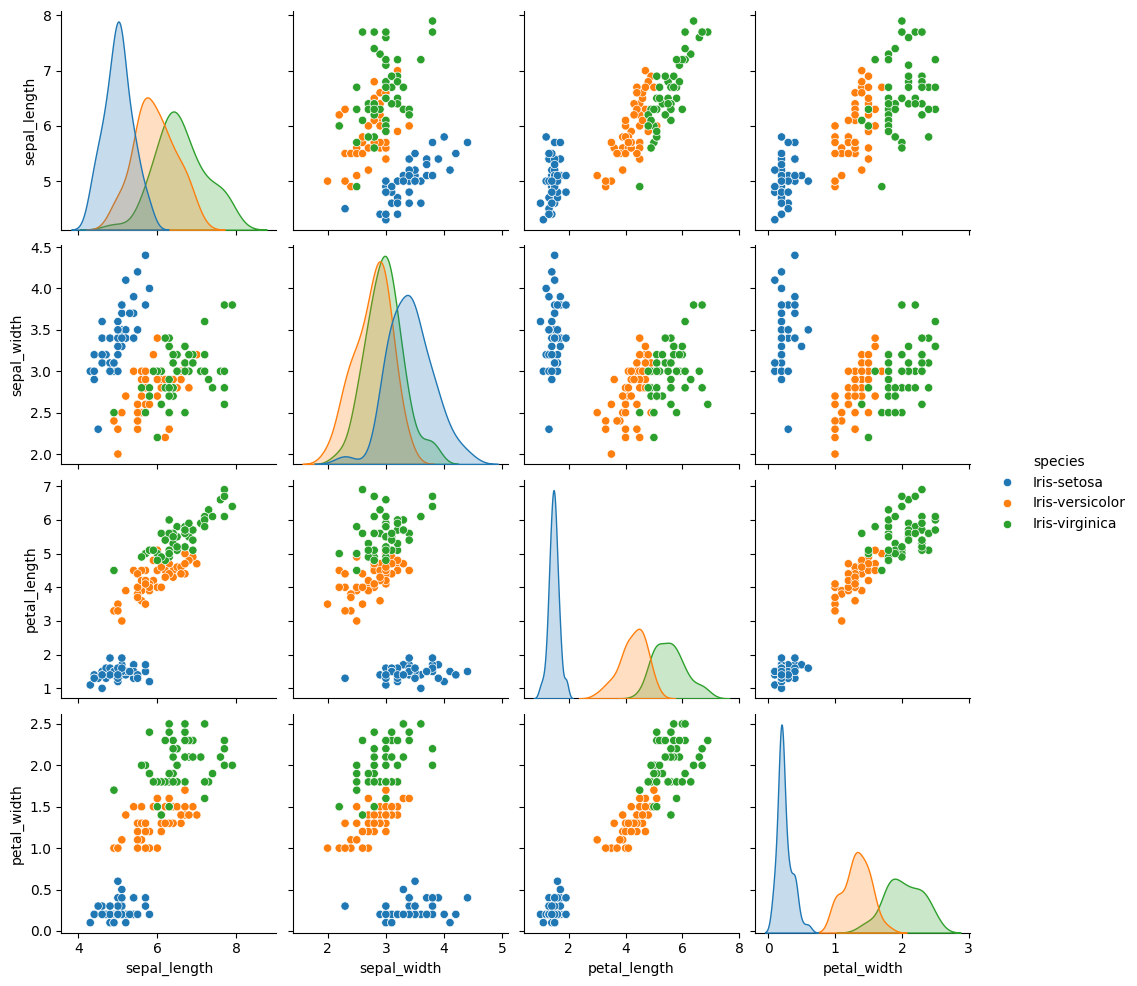

In [130]:
# Pair plot of the dataset
sns.pairplot(data, hue='species')
plt.show()

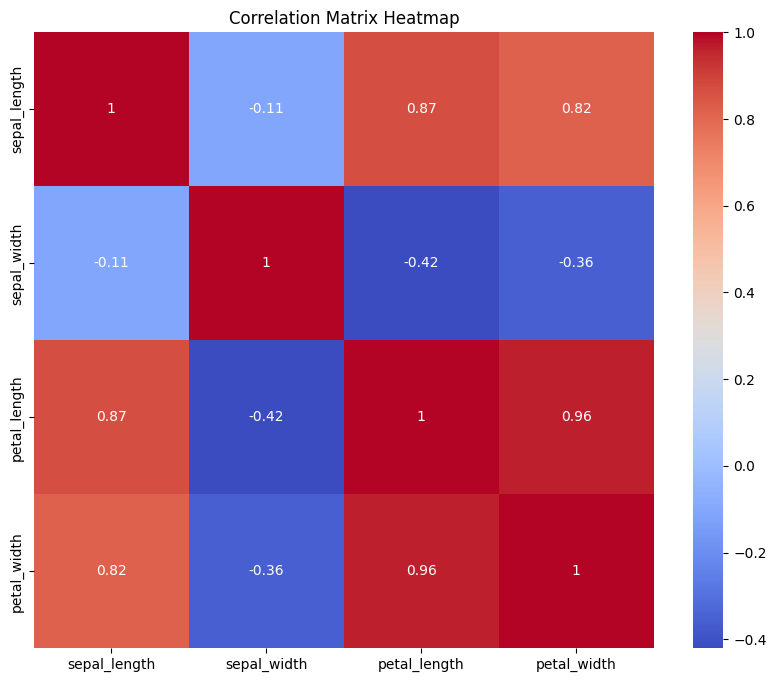

In [131]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.drop(columns='species').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

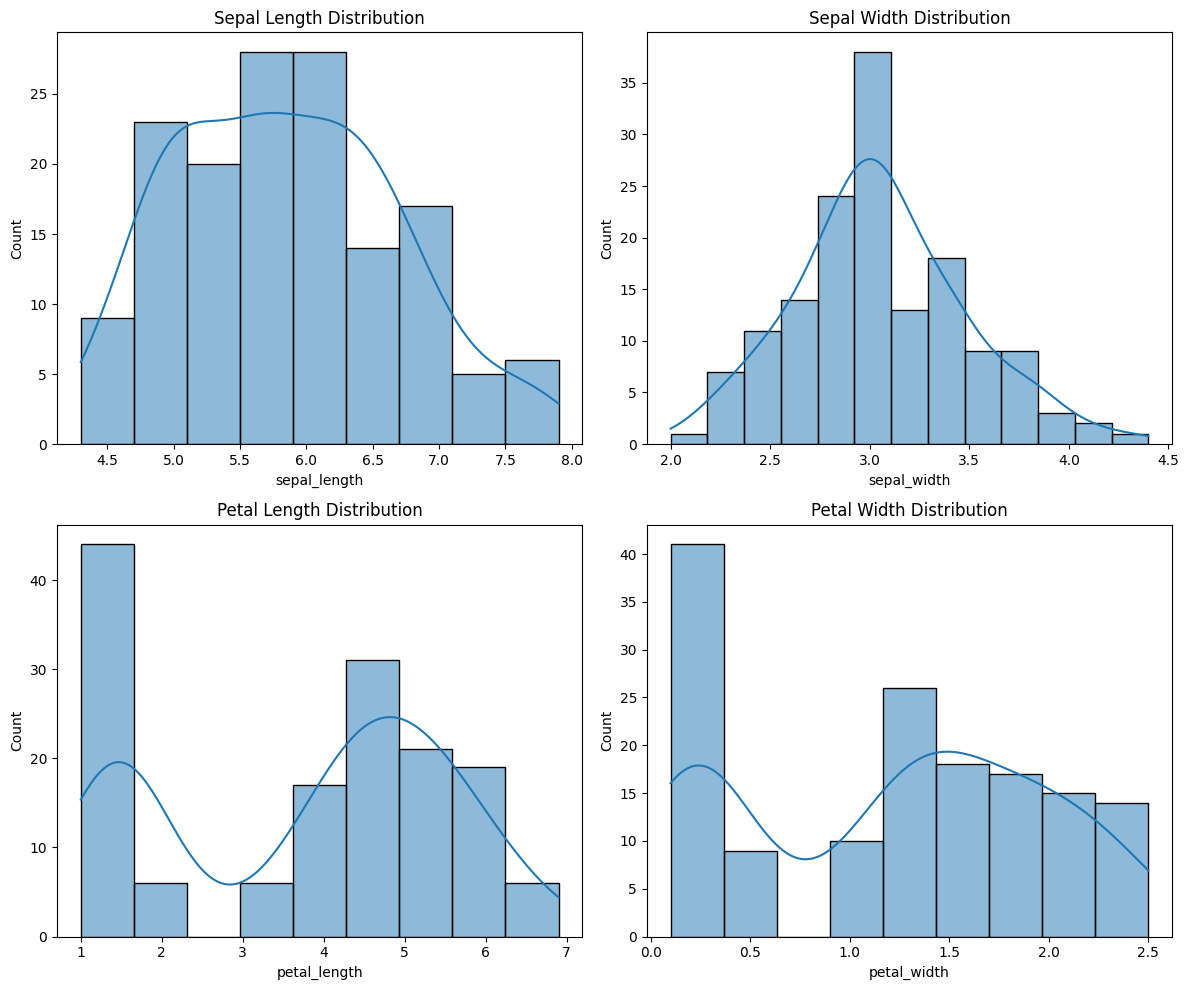

In [132]:
# Distribution of each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data['sepal_length'], kde=True, ax=axes[0, 0]).set_title('Sepal Length Distribution')
sns.histplot(data['sepal_width'], kde=True, ax=axes[0, 1]).set_title('Sepal Width Distribution')
sns.histplot(data['petal_length'], kde=True, ax=axes[1, 0]).set_title('Petal Length Distribution')
sns.histplot(data['petal_width'], kde=True, ax=axes[1, 1]).set_title('Petal Width Distribution')
plt.tight_layout()
plt.show()

In [133]:
# Encode the target variable
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])


In [134]:
# Split the data into features and target variable
X = data.drop(columns='species')
Y = data['species']


In [135]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [136]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [137]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [138]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [139]:
# Make predictions
y_pred = clf.predict(X_test)

In [140]:
# Evaluate the model
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Accuracy Score:", accuracy_score(Y_test, y_pred)*100)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score: 100.0


In [141]:
# Train a Support Vector Classifier
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [142]:
# Make predictions with SVC
svc_y_pred = svc_clf.predict(X_test)

In [143]:
# Evaluate the SVC model
print("SVC Classification Report:\n", classification_report(Y_test, svc_y_pred))
print("SVC Confusion Matrix:\n", confusion_matrix(Y_test, svc_y_pred))
print("SVC Accuracy Score:", accuracy_score(Y_test, svc_y_pred)*100)

SVC Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVC Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
SVC Accuracy Score: 100.0


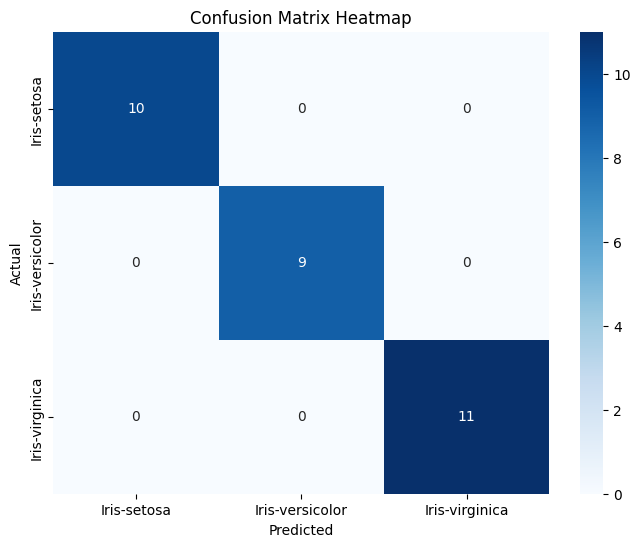

In [144]:
# Confusion Matrix Heatmap of random forest
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


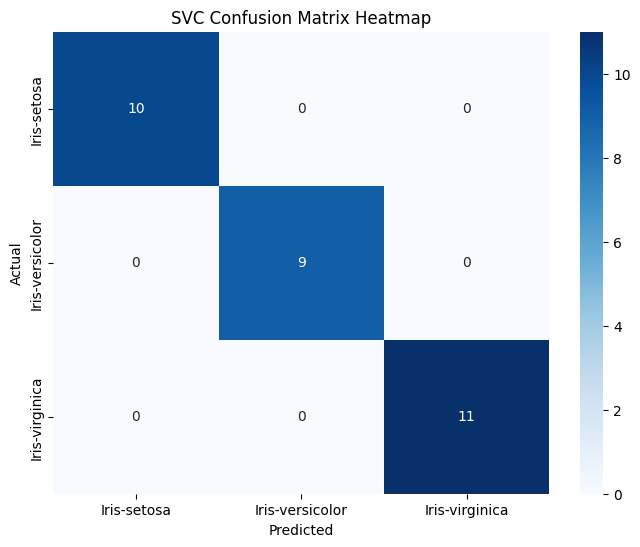

In [145]:
# Confusion Matrix Heatmap for SVC
svc_conf_matrix = confusion_matrix(Y_test, svc_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix Heatmap')
plt.show()

In [147]:
cv_scores = cross_val_score(clf, X, Y, cv=10)
svc_cv_scores = cross_val_score(svc_clf, X, Y, cv=10)
print("Random Forest Cross-Validation Scores:", cv_scores)
print("Random Forest Mean CV Score:", np.mean(cv_scores))
print("SVC Cross-Validation Scores:", svc_cv_scores)
print("SVC Mean CV Score:", np.mean(svc_cv_scores))

Random Forest Cross-Validation Scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
Random Forest Mean CV Score: 0.96
SVC Cross-Validation Scores: [1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
SVC Mean CV Score: 0.9733333333333334
